In [ ]:
!pip install pmdarima
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Regressão - Preços de carros audi usados

Imagine que você trabalha em um varejo de carros usados e tenha que regular a precificação dos produtos. No geral, essa função é difícil, pois envolve muitos fatores. Desse modo criarei um modelo de regressão linear que usará as features presentes no dataset para estimar um preço aproximado de Audis usados. 


**Colunas**

model: Modelo

year: Ano de fabricação

price: Preço de venda real

transmission: transmissão
    - Manual
    - Automática

mileage: quilometragem

tipo de combustível:
  - Petrol
  - Diesel

tax: o equivalente a IPVA nos estados unidos

mpg: milhas por galão


enginesize: Tamanho do bloco do motor

In [ ]:
qual = pd.read_csv('/content/drive/MyDrive/audi.csv')
qual.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4


## Análise exploratória

In [ ]:
qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [ ]:
qual.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10668,10668.000000,10668.000000,10668,10668.000000,10668,10668.000000,10668.000000,10668.000000
unique,26,NaN,NaN,3,NaN,3,NaN,NaN,NaN
top,A3,NaN,NaN,Manual,NaN,Diesel,NaN,NaN,NaN
freq,1929,NaN,NaN,4369,NaN,5577,NaN,NaN,NaN
mean,NaN,2017.100675,22896.685039,NaN,24827.244001,NaN,126.011436,50.770022,1.930709
std,NaN,2.167494,11714.841888,NaN,23505.257205,NaN,67.170294,12.949782,0.602957
min,NaN,1997.000000,1490.000000,NaN,1.000000,NaN,0.000000,18.900000,0.000000
25%,NaN,2016.000000,15130.750000,NaN,5968.750000,NaN,125.000000,40.900000,1.500000
50%,NaN,2017.000000,20200.000000,NaN,19000.000000,NaN,145.000000,49.600000,2.000000
75%,NaN,2019.000000,27990.000000,NaN,36464.500000,NaN,145.000000,58.900000,2.000000


Aqui percebemos que o dataset contém 10600 entradas, o que é suficiente para fazermos a análise pois os dados não estão sumarizados. Além disso, vemos que a maioria das colunas possui valores numéricos, o que tornará o modelo de regressão melhor. Também observamos que todas as colunas possuem a mesma quantidade de registros, o que indica que a base de dados está padronizada e não possui valores nulos. Outro fato a se notar é que temos um desvio padrão de 0.6 no tamanho do motor em litros, o que indica que  não há muita discreppância nesse fato pois todos os carros são da mesma marca. Por fim, também é possível notar que 50% dos carros cadastrados são modelos de 2017.

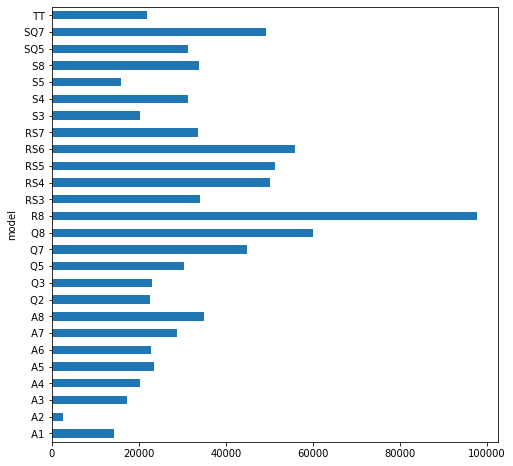

In [ ]:
qual.groupby('model')['price'].mean().plot.barh(figsize=(8,8))

Vendo a média de preços por modelo de carro, vemos que o modelo mais caro é o Audi R8, com uma média de preço de 100.000 dólares. Isso faz sentido pois é o modelo mais prestigiado da marca. Em segundo lugar, temos o modelo Q8, com uma média de preço de 60.000 dólares e em terceiro o RS6, com uma média de 58.000 dólares. O que pode se notar aqui é a grande discrepância do valor do R8 para os outros modelos, o que indica que isso é um fator importante na precificação. 

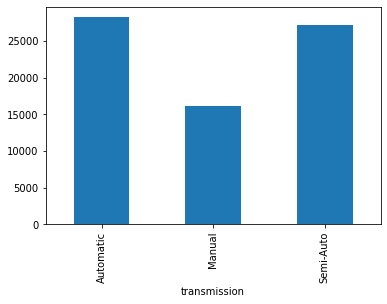

In [ ]:
qual.groupby('transmission')['price'].mean().plot.bar()

Carros com uma transmissão automática e semi-automática possuem um valor médio maior que carros com uma transmissão manual de 10.000 dólares, por causa do custo adicional que essa tecnologia envolve. Carros 100% automáticos são os que possuem o maior valor médio.

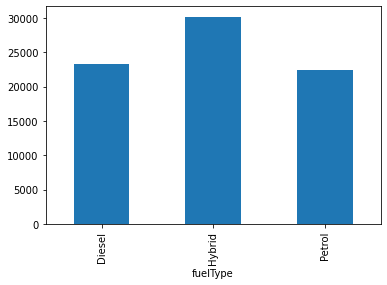

In [ ]:
qual.groupby('fuelType')['price'].mean().plot.bar()

Aqui também temos um claro exemplo de que a tecnologia adicional encarece o produto. Como visto no gráfico acima, carros híbridos tem um valor médio de 30.000 dólares enquanto aqueles que são movidos a gasolina e diesel possuem um valor médio de 23.000 dólares. 

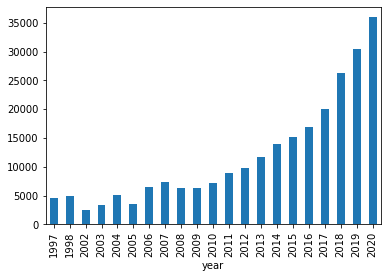

In [ ]:
qual.groupby('year')['price'].mean().plot.bar()

Esse gráfico revela que quanto mais recente a fabricação do modelo, mais o seu preço de venda foi maior. Isso faz muito sentido pois cada vez mais esses carros acompanham diversas tecnologias de segurança e eficiência. Isso também pode revelar que a marca está cada vez se tornando menos acessível a consumidores de baixa renda, podendo ser considerada uma fabricadora de prestígio.

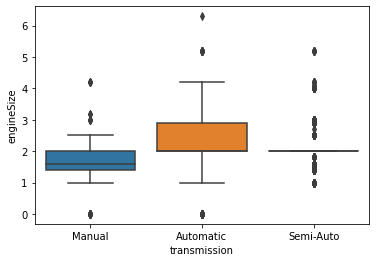

In [ ]:
sns.boxplot(x='transmission', y='engineSize',data=qual)

Esse gráfico revela o curioso fato de que carros com uma transmissão manual possuem em média um tamanho do motor menor do que carros com transmissão automática. Enquanto carros com uma transmissão semi-automática mostraram um intervalo de valores muito pe

## Regressão linear

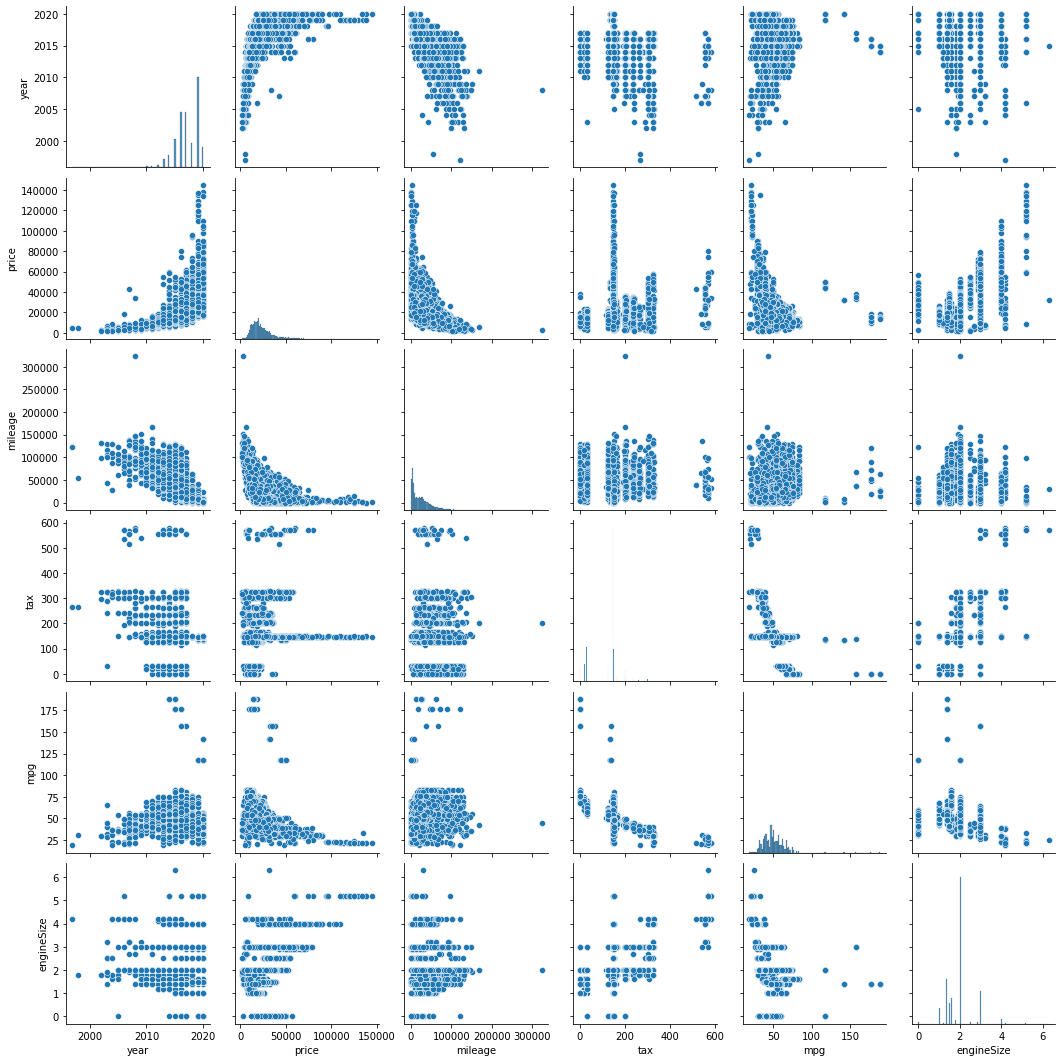

In [ ]:
sns.pairplot(qual)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


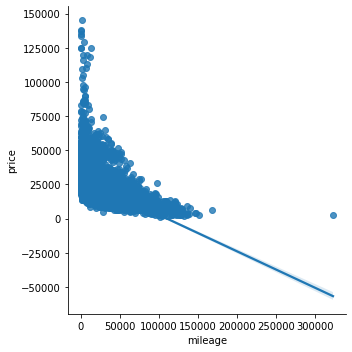

In [ ]:
sns.lmplot('mileage','price',data=qual)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


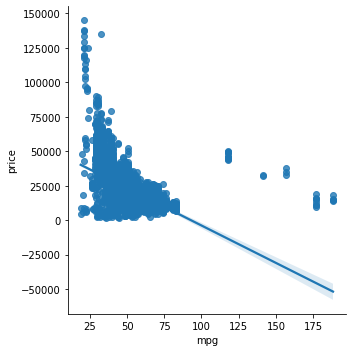

In [ ]:
sns.lmplot('mpg','price',data=qual)

In [ ]:
qual = qual.dropna()
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(qual, train_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(treino[['year','mileage','tax','mpg','engineSize']] ,treino['price'])
print(rl.coef_,rl.intercept_)

[ 2.05540994e+03 -9.75652112e-02 -1.09483772e+01 -1.91932712e+02
  1.08875559e+04] -4130570.3010819494


In [ ]:
rl.score(treino[['year','mileage','tax','mpg','engineSize']] ,treino['price'])

0.7736624888513882

In [ ]:
from sklearn import metrics
prevs = rl.predict(teste[['year','mileage','tax','mpg','engineSize']])
metrics.r2_score(teste['price'],prevs)

0.7805347633729822

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Preço real'), Text(0.5, 0, 'Preço previsto')]

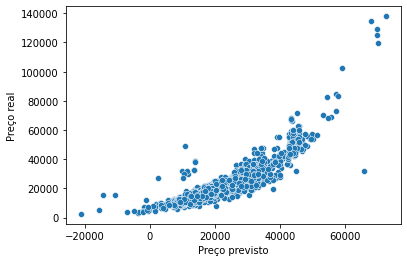

In [ ]:
ax = sns.scatterplot(prevs,teste['price'])
ax.set(xlabel='Preço previsto', ylabel='Preço real')

# Classificação/Agrupamento

In [ ]:
clima = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')
clima.head(3)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain


## Análise exploratória

## Modelo de classificação

In [ ]:
clima = clima.dropna()
clima['weather'] = clima['weather'].replace({'sun':0,'rain':1,'drizzle':2,'snow':3,'fog':4})
treino_tree, teste_tree = train_test_split(clima, train_size=0.7)
treino_tree.shape[0]

1022

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arv = DecisionTreeClassifier(max_depth=3)
arv.fit(treino_tree[['precipitation','temp_max','temp_min','wind']],treino_tree['weather'])
arv.score(treino_tree[['precipitation','temp_max','temp_min','wind']],treino_tree['weather'])

0.8551859099804305

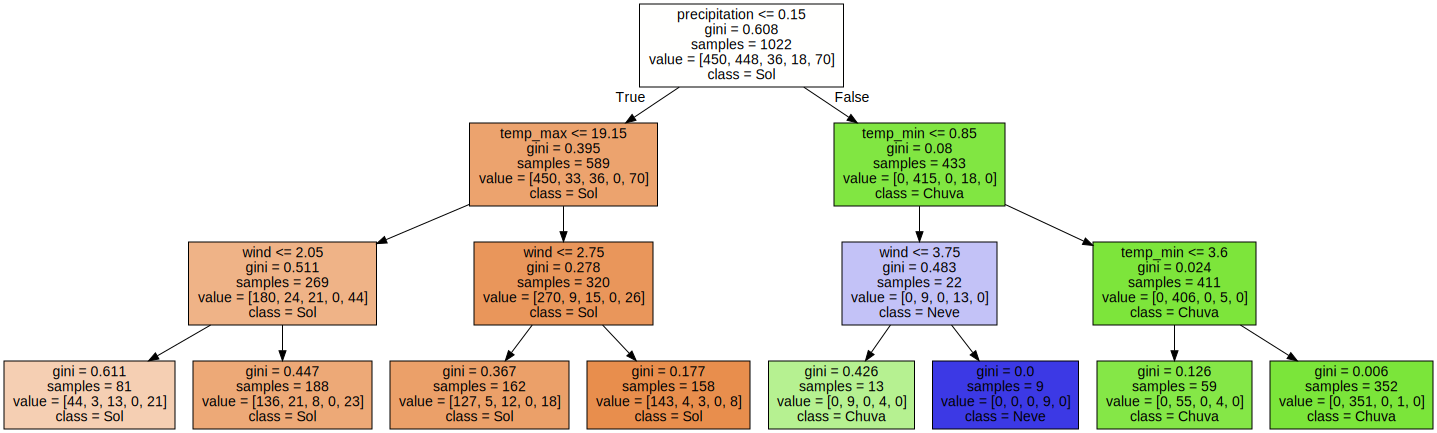

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(arv,filled=True,feature_names =['precipitation','temp_max','temp_min','wind'], class_names = ['Sol','Chuva','Granizo','Neve','Neblina'])
Source (dot_data)

In [ ]:
from sklearn.metrics import accuracy_score
p_teste = arv.predict(teste_tree[['precipitation','temp_max','temp_min','wind']])
y_teste = teste_tree['weather']
acuracia_Teste = accuracy_score(p_teste, y_teste)
acuracia_Teste * 100

85.42141230068337

[[190   0   0   0   0]
 [ 11 182   0   0   0]
 [ 17   0   0   0   0]
 [  0   5   0   3   0]
 [ 31   0   0   0   0]]


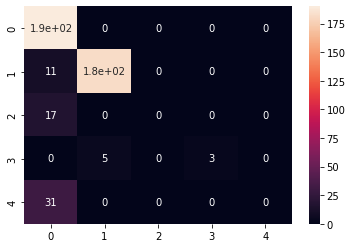

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste,p_teste)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,p_teste))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       190
           1       0.97      0.94      0.96       193
           2       0.00      0.00      0.00        17
           3       1.00      0.38      0.55         8
           4       0.00      0.00      0.00        31

    accuracy                           0.85       439
   macro avg       0.55      0.46      0.47       439
weighted avg       0.78      0.85      0.81       439



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo de agrupamento

In [ ]:
from sklearn.cluster import KMeans
base_kmeans = clima.drop(columns=['date','weather'],axis=1)
treino_kmeans, teste_kmeans = train_test_split(base_kmeans, train_size=0.8)
kmeans=KMeans(n_clusters=5)
kmeans.fit(treino_kmeans)
kmeans.labels_

array([1, 3, 2, ..., 2, 1, 1], dtype=int32)

In [ ]:
kmeans.score(treino_kmeans)*-1**0.5

29151.239821632495

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


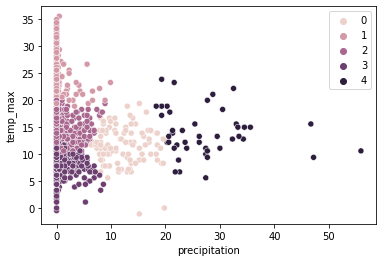

In [ ]:
sns.scatterplot(treino_kmeans['precipitation'],treino_kmeans['temp_max'],hue=kmeans.labels_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


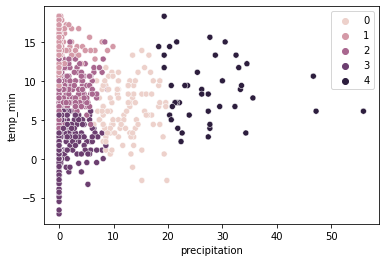

In [ ]:
sns.scatterplot(treino_kmeans['precipitation'],treino_kmeans['temp_min'],hue=kmeans.labels_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


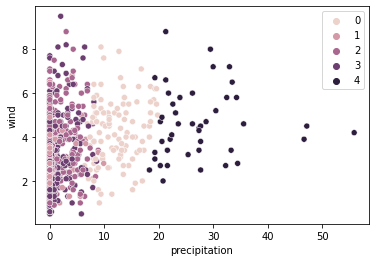

In [ ]:
sns.scatterplot(treino_kmeans['precipitation'],treino_kmeans['wind'],hue=kmeans.labels_)

In [ ]:
kmeansteste=KMeans(n_clusters=5)
prevs = kmeans.predict(teste_kmeans)
prevs

array([3, 1, 2, 1, 2, 0, 2, 1, 3, 0, 1, 1, 2, 3, 3, 1, 3, 1, 2, 3, 1, 2,
       1, 3, 3, 3, 1, 3, 0, 1, 1, 1, 2, 3, 3, 2, 0, 1, 3, 2, 1, 3, 3, 2,
       2, 1, 3, 3, 1, 1, 3, 3, 4, 0, 3, 1, 4, 3, 0, 3, 3, 0, 1, 2, 3, 3,
       2, 1, 0, 3, 0, 0, 1, 0, 1, 1, 2, 3, 2, 1, 2, 3, 3, 2, 2, 3, 2, 2,
       1, 3, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 0, 3,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1, 2, 2, 3, 3, 2, 4, 3, 2, 2, 2, 1,
       3, 1, 4, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2,
       2, 2, 3, 0, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 0, 1, 2, 1, 2,
       3, 3, 1, 2, 2, 0, 1, 2, 0, 3, 2, 3, 3, 0, 0, 0, 0, 1, 1, 2, 1, 0,
       2, 2, 3, 2, 2, 3, 3, 1, 3, 3, 3, 1, 2, 1, 1, 1, 2, 2, 1, 3, 2, 3,
       3, 1, 1, 2, 1, 2, 3, 0, 1, 2, 1, 3, 3, 2, 1, 4, 4, 3, 3, 0, 1, 2,
       4, 4, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 3, 2, 2, 4, 3, 2, 2, 3, 2, 2,
       0, 2, 1, 0, 3, 2, 2, 0, 3, 3, 1, 1, 2, 1, 2, 3, 1, 2, 2, 2, 4, 0,
       3, 1, 4, 1, 1, 2, 0], dtype=int32)

In [ ]:
kmeans.score(teste_kmeans)*-1**0.5

8798.659423929483

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


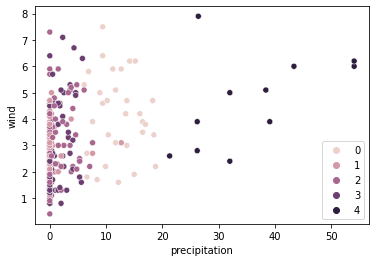

In [ ]:
sns.scatterplot(teste_kmeans['precipitation'],teste_kmeans['wind'],hue=prevs)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


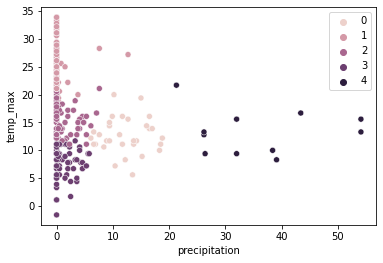

In [ ]:
sns.scatterplot(teste_kmeans['precipitation'],teste_kmeans['temp_max'],hue=prevs)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


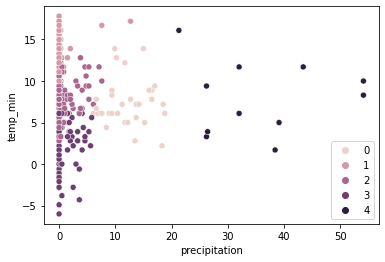

In [ ]:
sns.scatterplot(teste_kmeans['precipitation'],teste_kmeans['temp_min'],hue=prevs)

# Série temporal

In [ ]:
vendas_Tv = pd.read_csv('/content/drive/MyDrive/Date and model wise sale.csv')
vendas_Tv["Date"] = pd.to_datetime(vendas_Tv["Date"])
vendas_Tv

,Date,Model,Count
0,2016-08-31,M45,5
1,2016-08-31,M121,3
2,2016-08-31,M122,4
3,2016-08-31,M91,10
4,2016-08-31,M66,57
...,...,...,...
14351,2016-03-08,M22,1692
14352,2016-03-08,M24,1064
14353,2016-03-08,M59,1
14354,2016-03-08,M122,1


## Análise exploratória

## Arima

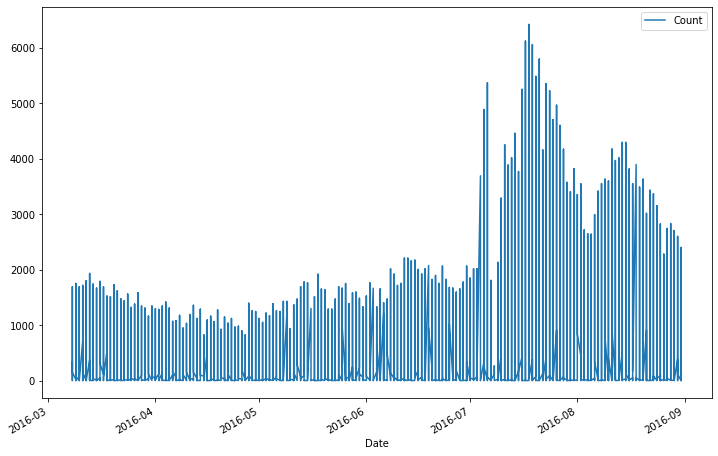

In [ ]:
vendas_Tv.index = vendas_Tv['Date']
vendas_Tv = vendas_Tv.drop(columns=['Date','Model'])
vendas_Tv.plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(vendas_Tv['Count'])

(-55.31464889673703,
 0.0,
 4,
 14351,
 {'1%': -3.4308057501261424,
  '10%': -2.566877211743815,
  '5%': -2.861741421171077},
 208492.97782113572)

In [ ]:
treino_arima = vendas_Tv.loc['01-03-2016':'25-07-2016']
teste_arima = vendas_Tv.loc['26-07-2016':]
print(treino_arima.shape + teste_arima.shape)

(11037, 1, 3319, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


In [ ]:
from pmdarima.arima import auto_arima
arr = auto_arima(treino_arima,trace = True,m=7)
arr.fit(treino_arima)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=64.96 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=166649.432, Time=0.36 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=163537.937, Time=2.73 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=17.83 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=166647.432, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=163538.159, Time=0.75 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=163539.761, Time=6.24 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=163539.939, Time=3.69 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=163537.955, Time=2.77 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=163541.761, Time=6.98 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=166646.903, Time=1.78 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=162227.399, Time=3.86 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=162227.535, Time=1.45 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=162229.200, Time=6.37 sec
 ARIMA(2,1,0)(1,0

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 7),
      suppress_warnings=True, with_intercept=False)

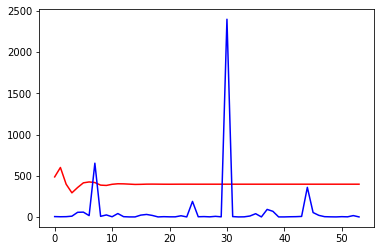

In [ ]:
pred = arr.predict(54) 
plt.plot(pred,color='red',label = 'Previsto')
plt.plot(teste_arima.reset_index()['Count'][:54],color='blue', label='Real')
plt.show()